In [38]:
# Kullanacağımız kütüphaneleri yükleyelim

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.neighbors import BallTree
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("daveianhickey/2000-16-traffic-flow-england-scotland-wales")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/2000-16-traffic-flow-england-scotland-wales


In [25]:
df1 = pd.read_csv("/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv",low_memory=False)
df2 = pd.read_csv("/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv",low_memory=False)
df3 = pd.read_csv("/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv",low_memory=False)

In [26]:
# Veri setlerini birleştirelim
df = pd.concat([df1, df2, df3], ignore_index=True)

In [27]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [28]:
df.shape

(1504150, 33)

In [29]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1

In [31]:
# Eksik değer kontrolü
df.isnull().sum()

,0
Accident_Index,0
Location_Easting_OSGR,101
Location_Northing_OSGR,101
Longitude,101
Latitude,101
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0


In [32]:
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_percent[missing_percent > 0])

Junction_Detail                                100.000000
Carriageway_Hazards                             98.188346
Special_Conditions_at_Site                      97.567929
Junction_Control                                40.078117
LSOA_of_Accident_Location                        7.195958
Did_Police_Officer_Attend_Scene_of_Accident      0.194263
Road_Surface_Conditions                          0.130173
Weather_Conditions                               0.008377
Time                                             0.007778
Latitude                                         0.006715
Location_Easting_OSGR                            0.006715
Longitude                                        0.006715
Location_Northing_OSGR                           0.006715
Pedestrian_Crossing-Physical_Facilities          0.002260
Pedestrian_Crossing-Human_Control                0.001130
dtype: float64


In [33]:
# %80'den fazla eksik değeri olan sütunları çıkaralım
df.drop(columns=['Junction_Detail', 'Junction_Control',
                 'Special_Conditions_at_Site', 'Carriageway_Hazards'], inplace=True)

In [34]:
# Az eksik olanları "Unknown" veya uygun bir değerle dolduralım
df['Time'] = df['Time'].fillna("Unknown")
df['Weather_Conditions'] = df['Weather_Conditions'].fillna("Unknown")
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna("Unknown")
df['Pedestrian_Crossing-Human_Control'] = df['Pedestrian_Crossing-Human_Control'].fillna("None")
df['Pedestrian_Crossing-Physical_Facilities'] = df['Pedestrian_Crossing-Physical_Facilities'].fillna("None")
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna("Unknown")

In [35]:
# Lokasyon eksikse (enlem-boylam), o satırları silebiliriz (101 kayıt, çok az)
df.dropna(subset=['Longitude', 'Latitude'], inplace=True)

In [36]:
# Tarih formatı düzenleme
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Time'].str[:2]  # saati al
df['Hour'] = pd.to_numeric(df['Hour'], errors='coerce')

# **Yıllara Göre Kaza Sayısı**

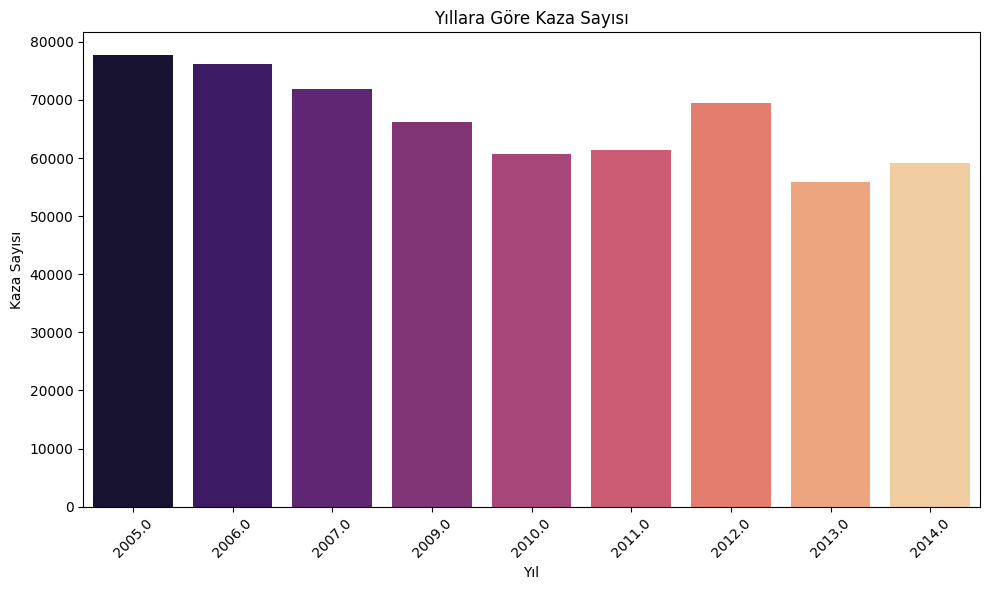

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', palette='magma')
plt.title('Yıllara Göre Kaza Sayısı')
plt.ylabel('Kaza Sayısı')
plt.xlabel('Yıl')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Aylara Göre Kaza Dağılımı**

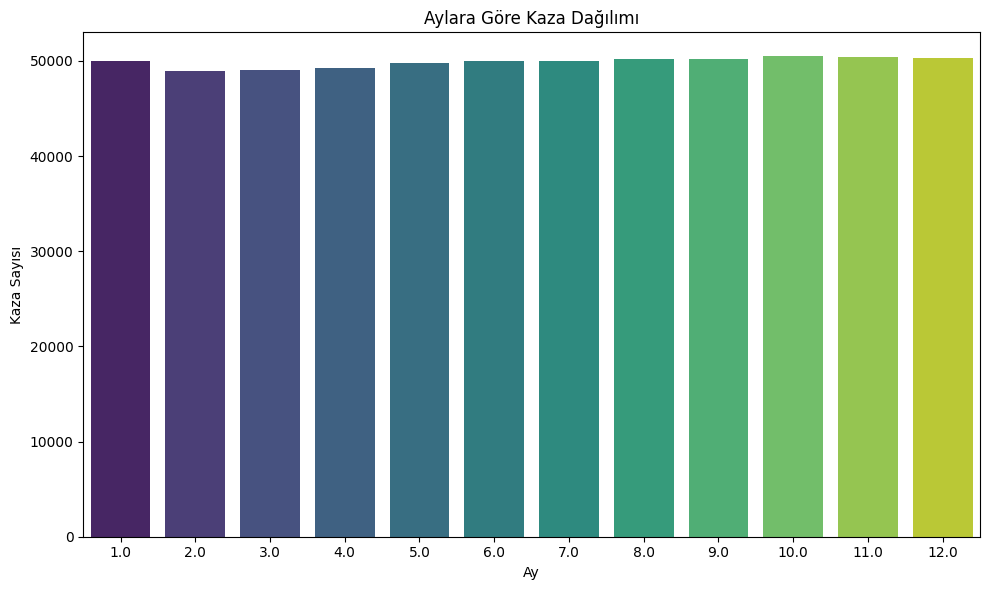

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', palette='viridis')
plt.title('Aylara Göre Kaza Dağılımı')
plt.ylabel('Kaza Sayısı')
plt.xlabel('Ay')
plt.tight_layout()
plt.show()

# **Hangi Hava Koşullarında Daha Fazla Kaza Oluyor?**

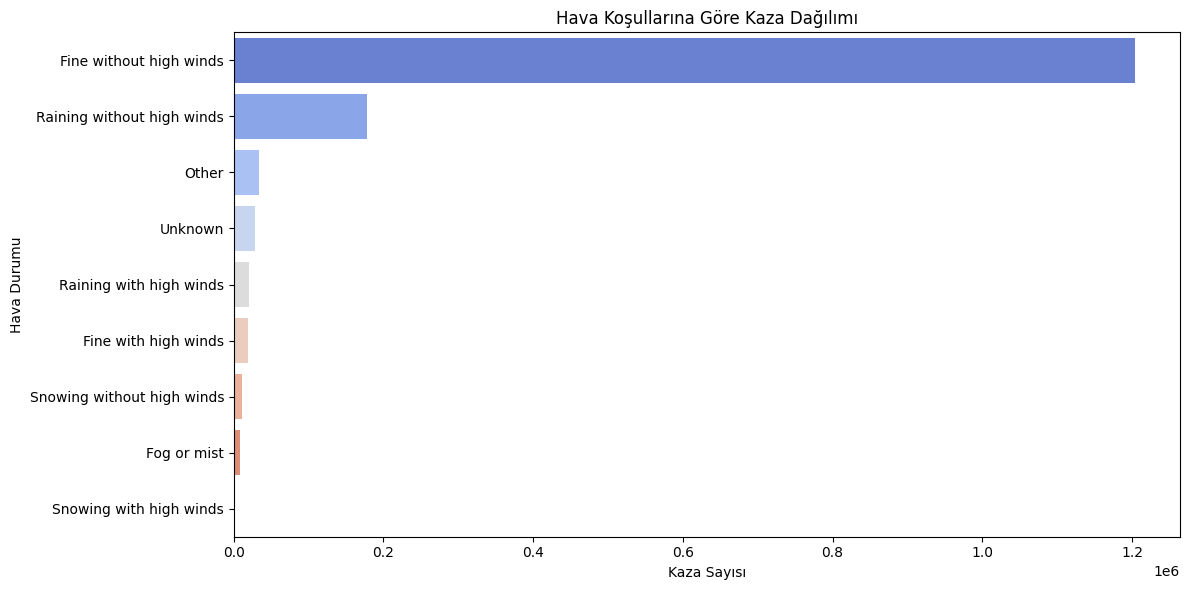

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Weather_Conditions', order=df['Weather_Conditions'].value_counts().index, palette='coolwarm')
plt.title('Hava Koşullarına Göre Kaza Dağılımı')
plt.xlabel('Kaza Sayısı')
plt.ylabel('Hava Durumu')
plt.tight_layout()
plt.show()

- "Fine without high winds" (Rüzgarsız güzel hava) koşullarında en fazla kaza yaşanmış. Bu sonuç ilk bakışta şaşırtıcı görünebilir çünkü bu tür hava genellikle güvenli olarak düşünülür. Ancak bu durum:

- Araç trafiğinin en yoğun olduğu zamanların genellikle iyi hava koşullarına denk gelmesi,

Sürücülerin dikkat düzeyinin düşük olması veya daha hızlı araç kullanması gibi nedenlerle açıklanabilir.

- "Raining without high winds" (Rüzgarsız yağmurlu hava) ikinci sırada geliyor. Bu da yağmurun, özellikle zemin kayganlığı nedeniyle kaza riskini artırdığını gösteriyor.

- Diğer hava koşulları (kar, sis, yüksek rüzgar) ise çok daha az kazaya neden olmuş. Bunun nedeni, bu tip hava koşullarında insanların daha dikkatli sürmesi veya trafiğe çıkmamayı tercih etmesi olabilir.

# **Yol Yüzeyi ve Işık Koşullarına Göre Kaza**

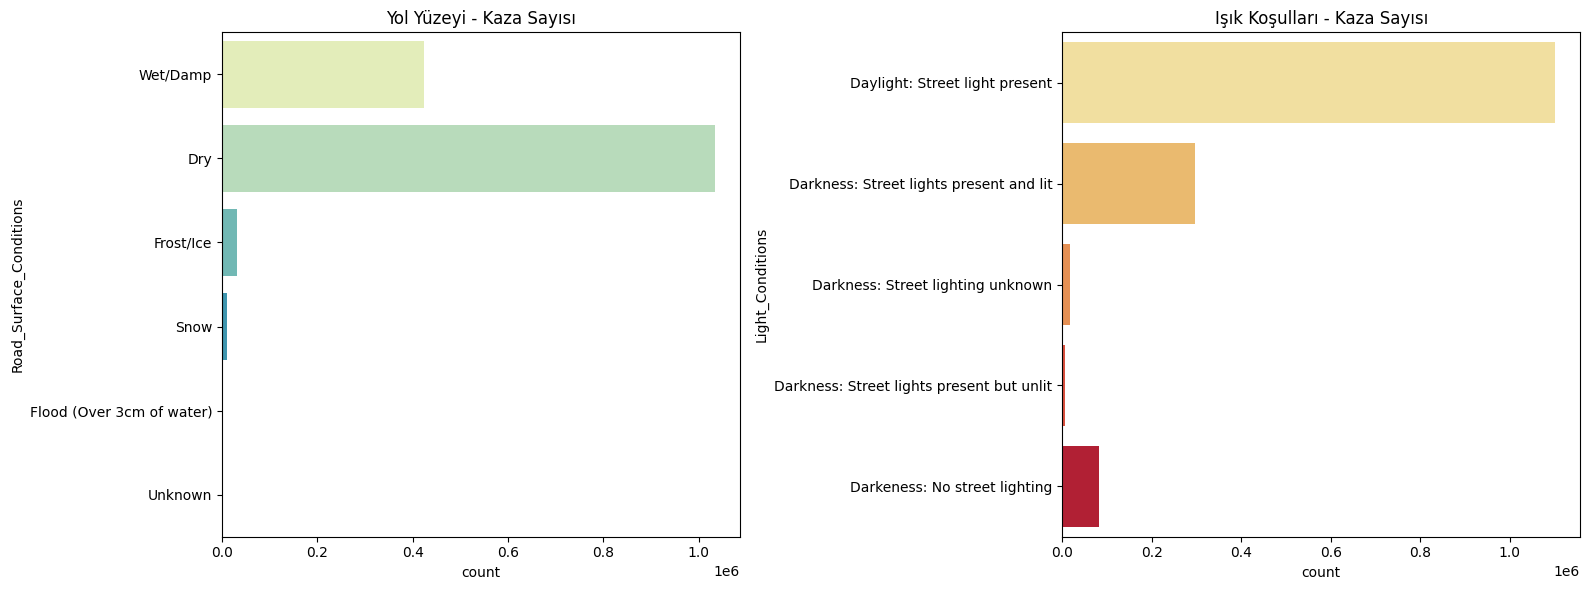

(None,)

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=df, y='Road_Surface_Conditions', ax=ax[0], palette='YlGnBu')
ax[0].set_title('Yol Yüzeyi - Kaza Sayısı')

sns.countplot(data=df, y='Light_Conditions', ax=ax[1], palette='YlOrRd')
ax[1].set_title('Işık Koşulları - Kaza Sayısı')

plt.tight_layout()
plt.show(),

**Yol Yüzeyine Göre Kaza Dağılımı**

- "Dry" (Kuru zemin) en fazla kazanın yaşandığı yol yüzeyi. Bu, yine araçların daha hızlı kullanılması ve sürücülerin zemine güvenerek daha az dikkatli olmasıyla açıklanabilir.

- "Wet/Damp" (Islak/nemli zemin) ikinci sırada yer alıyor ve oldukça yüksek sayıda kazaya neden olmuş. Bu, su nedeniyle fren mesafesinin artması veya yol tutuşunun düşmesi gibi sebeplerle ilişkilidir.

- "Frost/Ice", "Snow", "Flood" gibi tehlikeli yüzey koşullarında ise kaza sayısı çok daha düşüktür. Yine benzer şekilde, bu koşullarda sürücülerin daha temkinli davrandıkları düşünülebilir.

**Işık Koşullarına Göre Kaza Dağılımı**

- "Daylight: Street light present" (Gündüz, sokak lambası mevcut) koşullarında en fazla kaza yaşanmış. Bu, trafik yoğunluğunun gündüz saatlerinde daha fazla olmasına bağlanabilir.

- "Darkness: Street lights present and lit" (Gece, sokak lambaları var ve yanıyor) koşullarında ikinci sırada yer alan yüksek kaza oranı dikkat çekici. Aydınlatma olsa da gece görüş mesafesinin az olması kazalara neden olabilir.

- "Darkness: No street lighting" (Sokak lambası olmayan karanlık) koşullarında ise kaza sayısı daha az ama yine de ciddi seviyededir. Bu koşullar, sürücü için risklidir ve güvenlik açıklarına işaret eder.



# **Kırsal ve Kentsel Alanlarda Kaza Sayısı**

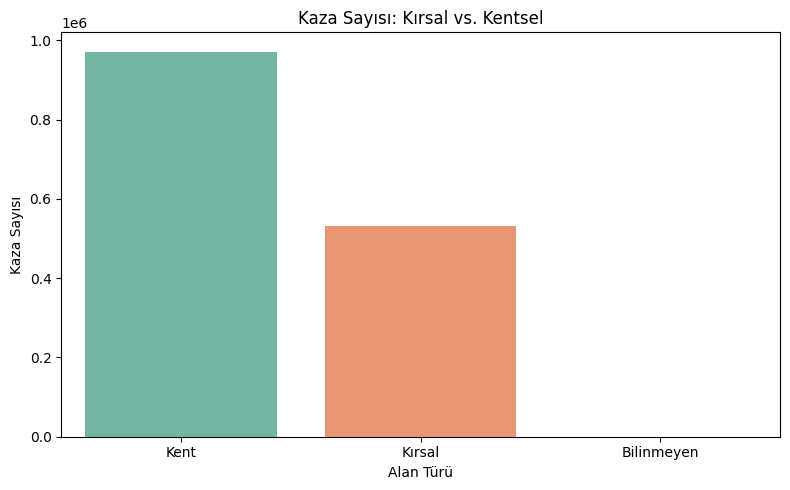

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Urban_or_Rural_Area', palette='Set2')
plt.title('Kaza Sayısı: Kırsal vs. Kentsel')
plt.xlabel('Alan Türü')
plt.ylabel('Kaza Sayısı')
plt.xticks([0,1,2], ['Kent', 'Kırsal', 'Bilinmeyen'])
plt.tight_layout()
plt.show()

- Kentsel alanlardaki kaza oranı ~1.0, kırsalda ise ~0.6 düzeyinde.

- Bu, kentsel alanlarda daha fazla kaza olduğunu gösteriyor.

- Bu farkın başlıca nedeni, şehirlerde araç ve yaya yoğunluğunun, dolayısıyla trafik hareketliliğinin çok daha fazla olması olabilir.

- Ayrıca sinyalizasyon sistemleri, kavşaklar, park problemleri gibi karmaşık trafik yapıları şehirlerde kazaları artırıyor olabilir.

Toplamda daha fazla kaza şehirlerde olurken, bu durum kırsalda daha az trafik olduğu anlamına gelebilir; ancak bu sadece sayısal farktır, ciddiyet açısından farklı bir tablo olabilir.

# **Kaza Ciddiyetine Göre Kırsal-Kentsel Karşılaştırma**

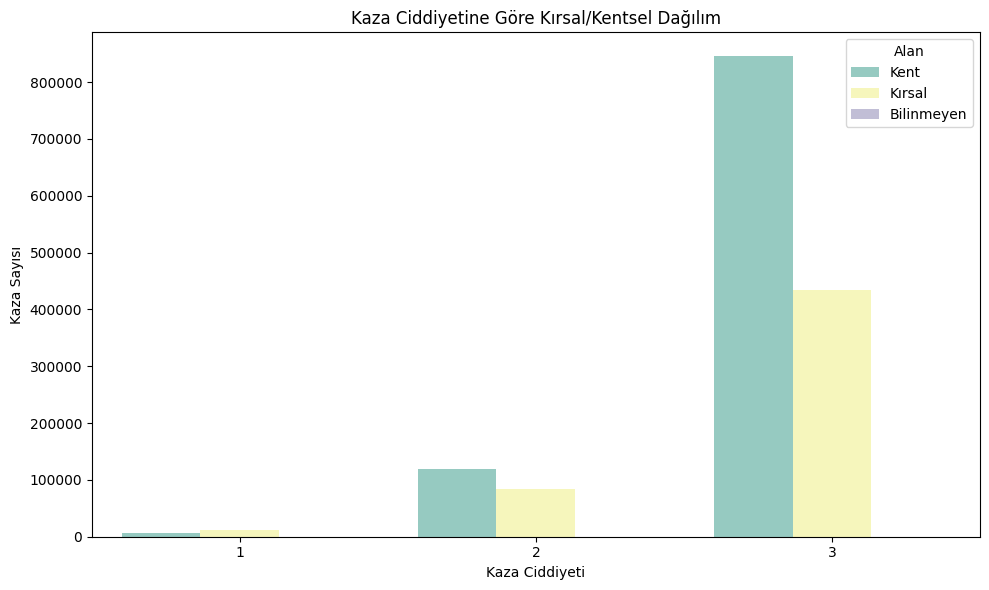

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Accident_Severity', hue='Urban_or_Rural_Area', palette='Set3')
plt.title('Kaza Ciddiyetine Göre Kırsal/Kentsel Dağılım')
plt.xlabel('Kaza Ciddiyeti')
plt.ylabel('Kaza Sayısı')
plt.legend(title='Alan', labels=['Kent', 'Kırsal', 'Bilinmeyen'])
plt.tight_layout()
plt.show()

-- Ciddiyet 1 (ölümcül):

- Her iki bölgede de 100 binin altında.

- Ancak kırsalda daha fazla.

- Bu, kırsal kazaların daha ölümcül olabileceğine işaret ediyor.

- Muhtemel nedenler:

- Yüksek hız limitleri

- Acil müdahale olanaklarının sınırlı olması

- Tek şeritli, dar yollar

-- Ciddiyet 2 (ciddi yaralanma):

- Kent > kırsal, ancak fark az.

- Şehirlerde daha çok kazanın olmasıyla ilişkili olabilir.

-- Ciddiyet 3 (hafif yaralanma):

- Şehirlerde çok daha fazla (~800k > ~450k).

- Bu, şehirlerde daha çok kazanın olduğunu ama ölümcül değil hafif kazalar şeklinde gerçekleştiğini gösteriyor.

Kırsal kazalar daha ölümcül, kentsel kazalar daha sık ve hafif geçiyor. Bu farklılıklar acil müdahale, yol yapısı, hız ve trafik kontrol sistemlerinin farklılığından kaynaklanıyor olabilir.

# **Zaman İçinde Kırsal-Kentsel Kaza Dağılımı**

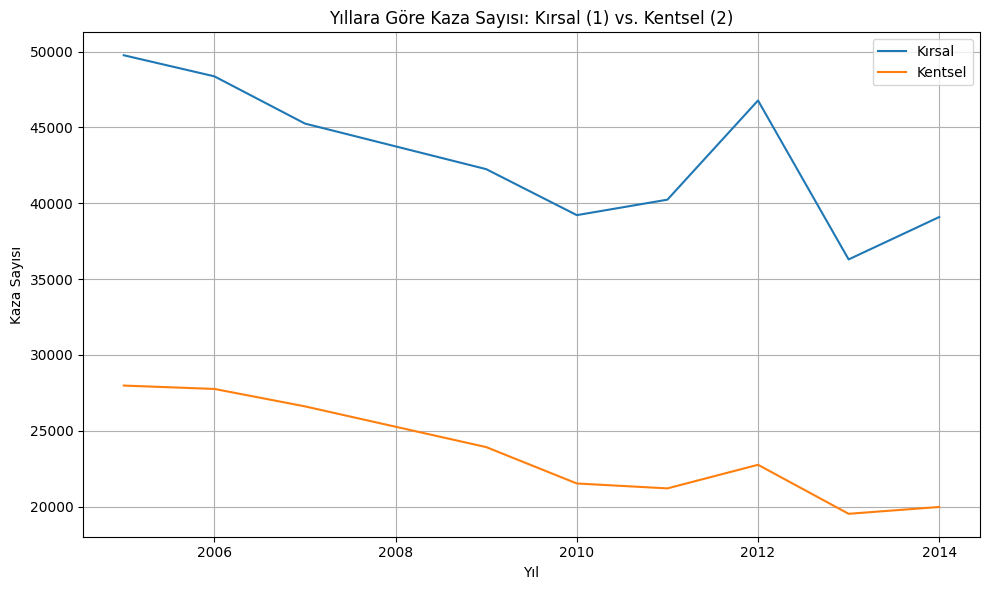

In [45]:
rural_urban_year = df.groupby(['Year', 'Urban_or_Rural_Area']).size().unstack()
rural_urban_year[[1, 2]].plot(kind='line', figsize=(10,6))
plt.title("Yıllara Göre Kaza Sayısı: Kırsal (1) vs. Kentsel (2)")
plt.xlabel("Yıl")
plt.ylabel("Kaza Sayısı")
plt.legend(["Kırsal", "Kentsel"])
plt.grid(True)
plt.tight_layout()
plt.show()

- Kentsel kazalar 30 binin altında ve yıllar geçtikçe düzenli olarak azalma eğiliminde.

- Kırsal kazalar daha yüksek seviyede başlıyor (50k), yıllar içinde azalıyor ama 2012'de ani bir artış gözleniyor.

- Bu sıçrama, yol çalışmaları, hava koşulları, ya da veri girişindeki değişimlerden kaynaklı olabilir.

- Sonrasında tekrar düşüş görülüyor.

- Genel olarak her iki alanda da kazalar zamanla azalma eğiliminde, bu da trafik güvenliği önlemlerinin etkili olabileceğini gösteriyor.

# **Genel Sonuç ve Bağlantı Kurma**

-- Trafik akışının değişmesi kazaları nasıl etkiler?

→ Kentsel alanlarda yoğun trafik, daha çok ama daha hafif kazalara yol açıyor. Kırsalda trafik az ama hızlı, bu da daha ölümcül kazalara neden oluyor.

-- Kaza oranlarını ne artırır?

→ Hız, yetersiz denetim, yol yapısı, acil müdahale eksikliği gibi faktörler kırsalda; yoğunluk, sinyalizasyon, kavşaklar şehirlerde etkili olabilir.

-- Zaman içinde kaza oranlarını tahmin edebilir miyiz?

→ Veriler azalan bir trend gösteriyor; bu da uygun modelleme ile geleceğe yönelik tahminlerin yapılabileceğini gösteriyor.

-- Kırsal ve kentsel alanlar nasıl farklılaştı?

→ Kentsel: daha fazla ama daha hafif kazalar.
→ Kırsal: daha az ama daha ölümcül kazalar.